In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('new2417.csv', index_col = 0)
print(data.head(2))
print()

print(data['Magnetic'].value_counts())

  Formula  SGnumber  Magmom  Magnetic
0  Ca4As4        14     0.0     False
1  In2Se2        12     0.0     False

False    1292
True     1125
Name: Magnetic, dtype: int64


In [2]:
from matminer.featurizers.conversions import StrToComposition
data_Composition = StrToComposition().featurize_dataframe(data, 'Formula')

from matminer.featurizers.conversions import CompositionToOxidComposition
data_Oxide = CompositionToOxidComposition().featurize_dataframe(data_Composition, 'composition')

from matminer.featurizers.composition import OxidationStates
data_OS = OxidationStates().featurize_dataframe(data_Oxide, 'composition_oxid')

from matminer.featurizers.composition import ElementProperty
ep_feat = ElementProperty.from_preset(preset_name='magpie')
data_EP = ep_feat.featurize_dataframe(data_OS, col_id = 'composition')
data_EP.head(2)

StrToComposition:   0%|          | 0/2417 [00:00<?, ?it/s]

CompositionToOxidComposition:   0%|          | 0/2417 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/2417 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/2417 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,Ca4As4,14,0.0,False,"(Ca, As)","(Ca2+, As3-, As-)",-3,2,5,2.683282,...,0.0,0.0,0.0,0.0,166.0,225.0,59.0,195.5,29.5,166.0
1,In2Se2,12,0.0,False,"(In, Se)","(In+, In3+, Se2-)",-2,3,5,2.683282,...,0.0,0.0,0.0,0.0,14.0,139.0,125.0,76.5,62.5,14.0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [4]:
y = data_EP['Magnetic'].values
excluded = ['Formula', 'Magmom', 'composition', 'composition_oxid', 'Magnetic']
X = data_EP.drop(excluded, axis = 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, 
                                                    test_size = 0.3,
                                                    random_state = 79)

In [6]:
X.describe()

,SGnumber,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
count,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,...,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000,2417.000000
mean,101.334712,-1.718659,3.190319,4.908978,2.790315,17.889119,47.954903,30.065784,29.975149,11.320667,...,0.189744,0.052065,0.068965,0.005985,52.446835,208.581299,156.134464,114.518821,63.228374,66.239139
std,69.602627,0.963465,1.721318,2.421959,1.316851,13.611513,20.057782,18.864151,14.558804,7.602704,...,0.541907,0.161845,0.205000,0.086009,53.794593,31.627569,60.648036,41.489602,26.294099,64.679373
min,1.000000,-4.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,2.727273,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,0.000000,12.000000,0.000000,2.000000
25%,14.000000,-2.000000,2.000000,4.000000,2.323790,8.000000,32.000000,15.000000,18.000000,5.777778,...,0.000000,0.000000,0.000000,0.000000,12.000000,194.000000,130.000000,85.666667,48.750000,12.000000
50%,129.000000,-2.000000,3.000000,5.000000,2.828427,16.000000,46.000000,26.000000,28.333333,9.555556,...,0.000000,0.000000,0.000000,0.000000,15.000000,225.000000,165.000000,107.333333,67.454545,64.000000
75%,164.000000,-1.000000,4.000000,7.000000,3.609199,25.000000,64.000000,40.000000,40.666667,15.040000,...,0.000006,0.000002,0.000003,0.000000,64.000000,229.000000,213.000000,139.166667,82.666667,70.000000
max,191.000000,0.000000,8.000000,11.000000,6.363961,81.000000,94.000000,85.000000,82.000000,37.500000,...,2.110663,1.290393,1.055331,2.110663,227.000000,229.000000,227.000000,228.333333,108.500000,229.000000


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
scaler.fit(X_train)

StandardScaler()

In [9]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [10]:
np.mean(X_train_s, axis = 0)

array([-3.04638370e-17,  1.36562028e-17,  2.10095427e-18, -5.46248111e-17,
       -2.73124056e-17,  1.00845805e-16, -2.52114513e-17,  7.14324453e-17,
        1.84883976e-16,  1.40763936e-16, -5.88267197e-17, -4.20190855e-17,
       -9.45429424e-16,  7.56343539e-17, -6.80709185e-16, -1.72278251e-16,
       -4.83219483e-17,  2.31104970e-16,  1.99590656e-16,  7.66848310e-17,
       -6.72305368e-17, -1.11875815e-16,  8.40381710e-17, -9.24419881e-17,
       -1.84883976e-16, -1.99590656e-16,  2.10095427e-16, -2.98335507e-16,
       -1.46541561e-16, -3.36152684e-17,  7.22728271e-16, -1.63874433e-16,
       -4.62209940e-17,  1.90136362e-16, -7.87857853e-17,  3.36152684e-17,
        1.13451531e-16,  3.36152684e-17,  0.00000000e+00, -2.10095427e-17,
       -1.30259165e-16,  2.94133598e-17, -3.19345050e-16, -3.25647913e-17,
        2.18499245e-16, -5.56752883e-17, -2.52114513e-17,  2.10095427e-17,
       -2.47912604e-16,  1.27107734e-16, -6.13478648e-16,  2.22701153e-16,
        2.73124056e-17, -

In [11]:
np.std(X_train_s, axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

In [12]:
np.mean(X_test_s, axis = 0)

array([ 0.09449565, -0.06659615, -0.00360915,  0.02363078,  0.03490922,
       -0.05490229,  0.01303792,  0.05416031, -0.01499272,  0.06918839,
        0.00334785,  0.00526255, -0.01591074, -0.00998966, -0.00892146,
       -0.01086822, -0.0571491 , -0.05720869,  0.01410829,  0.0539875 ,
       -0.0145184 ,  0.0676643 ,  0.00262801, -0.01359948,  0.03601259,
        0.03983138,  0.02153644,  0.01860301,  0.03490913, -0.01734772,
       -0.03802609,  0.00492397, -0.02318147, -0.01451456, -0.05351097,
       -0.05216944,  0.02232158,  0.06627112, -0.01416184,  0.07549848,
        0.00289971, -0.03311503,  0.04527013,  0.05462294, -0.00742632,
        0.04025911,  0.00967507,  0.00227377, -0.03162629, -0.0262445 ,
       -0.02547312, -0.0311232 , -0.02895065,  0.0024012 , -0.00566411,
       -0.00277864,  0.01331317, -0.01210629, -0.03971007, -0.00504459,
       -0.05330913, -0.03829552, -0.0328097 , -0.06630429, -0.04890147,
       -0.02679992, -0.0002517 ,  0.02315553, -0.02226938,  0.02

In [13]:
np.std(X_test_s, axis = 0)

array([9.86904641e-01, 1.03220650e+00, 9.82646343e-01, 9.97774884e-01,
       9.93414143e-01, 9.54907403e-01, 9.76381581e-01, 1.00281106e+00,
       9.59993569e-01, 1.01857775e+00, 1.01939127e+00, 9.83865479e-01,
       8.76370753e-01, 9.77942327e-01, 9.83085978e-01, 1.01337704e+00,
       1.02433824e+00, 9.52862165e-01, 9.76104208e-01, 1.00350636e+00,
       9.58924310e-01, 1.01871239e+00, 1.02044685e+00, 9.06318497e-01,
       1.03106710e+00, 1.02741036e+00, 1.02305855e+00, 9.95295909e-01,
       1.03985998e+00, 9.94251386e-01, 1.04110075e+00, 9.93463224e-01,
       1.02291223e+00, 1.00025016e+00, 1.02146670e+00, 9.79427074e-01,
       9.59660374e-01, 9.96744013e-01, 9.66365886e-01, 1.01119252e+00,
       1.01684687e+00, 9.99667354e-01, 1.00565317e+00, 1.03468710e+00,
       9.88776910e-01, 1.02606592e+00, 1.02045005e+00, 1.03072027e+00,
       1.00940248e+00, 9.87712552e-01, 1.03944183e+00, 9.77601848e-01,
       1.02142228e+00, 1.00512641e+00, 1.07906143e+00, 9.99903703e-01,
      

In [14]:
modelsvc = SVC(kernel="linear", random_state = 1)
modelsvc.fit(X_train_s, y_train)
modelsvc.score(X_test_s, y_test)

0.7988980716253443

In [15]:
param_grid = {'C': [0.1, 1, 10],
              'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
              'gamma': [0.01, 0.1, 1]}
kfold = StratifiedKFold(n_splits=10, shuffle=True,
                        random_state = 55)
model_svc = GridSearchCV(SVC(random_state = 56),
                     param_grid, cv = kfold)

In [16]:
model_svc.fit(X_train_s, y_train)
model_svc.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [17]:
model_svc.score(X_test_s, y_test)

0.8512396694214877

In [18]:
model_svc.best_estimator_

SVC(C=10, gamma=0.01, random_state=56)

In [19]:
model_SVC = SVC(C=10, gamma=0.01, random_state=12, kernel='rbf')
model_SVC.fit(X_train_s, y_train)
model_SVC.score(X_test_s, y_test)

0.8512396694214877

In [20]:
y_pred = model_SVC.predict(X_test_s)
y_pred.shape

(726,)

[[330  58]
 [ 50 288]]


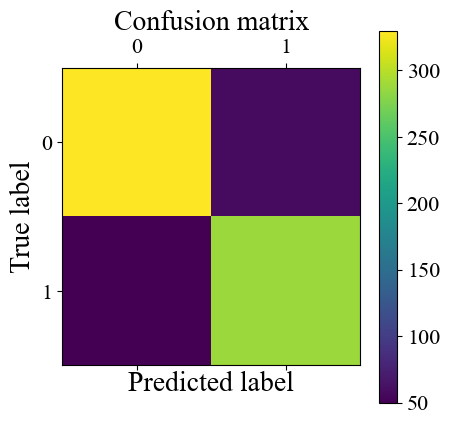

In [22]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman']
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('Confusion matrix',fontsize = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.ylabel('True label', fontsize = 20)
plt.xlabel('Predicted label',fontsize = 20)
plt.savefig('c3.png', dpi = 300)
#plt.show()

In [23]:
#from sklearn.inspection import plot_partial_dependence
table = pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames = ['Predicted'])
table

Predicted,False,True
Actual,,
False,330,58
True,50,288


In [24]:
table = np.array(table)
Accuracy = (table[0, 0] + table[1,1]) /np.sum(table)
print(Accuracy)

Error_rate = 1 - Accuracy
print(Error_rate)

0.8512396694214877
0.14876033057851235


In [25]:
Precision = table[1, 1]/(table[1, 1]+table[0, 1])
print('Precision:', Precision)

Sensitivity = table[1, 1]/(table[1, 0] + table[1,1])
print(Sensitivity)

Specificity = table[0, 0] /(table[0,0] + table[0, 1])
print(Specificity)

Recall = table[1, 1] /(table[0, 1] + table[1,1])
print(Recall)

print(f1_score(y_test, y_pred))
cohen_kappa_score(y_test, y_pred)

Precision: 0.8323699421965318
0.8520710059171598
0.8505154639175257
0.8323699421965318
0.8421052631578949


0.7015166280911196

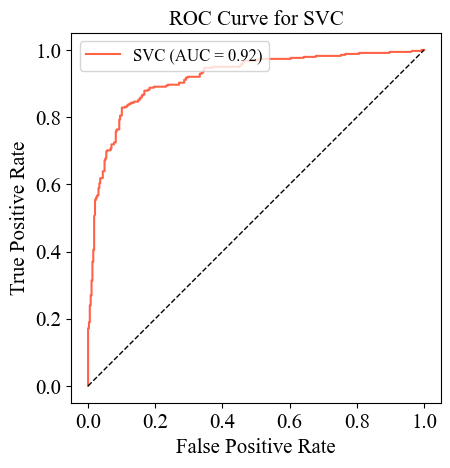

In [37]:
from sklearn.metrics import RocCurveDisplay
plt.rcParams['font.sans-serif']=['Times New Roman']

RocCurveDisplay.from_estimator(model_SVC, X_test_s, y_test, color = 'tomato')
x = np.linspace(0, 1, 100)
plt.plot(x, x, 'k--', linewidth = 1)
plt.title('ROC Curve for SVC', fontsize = 15)
plt.axis('square')
plt.xlim()
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate',fontsize = 15)
fontdict = {'family': 'Times New Roman',
            'size': 12}
            #'style': 'italic'}
plt.legend(prop=fontdict, loc = 'upper left')
plt.savefig('r3.png', dpi = 300)
#plt.show()

In [28]:
df_ex = pd.read_csv('testset0.csv', index_col = 0)
df_ex['Magmom'] = df_ex['Magmom'].round(3)
df_ex.head(2)

,Formula,SGnumber,Magmom,Magnetic
209,CrI3,162,6.001,True
4955,CrGeTe3,162,6.002,True


In [29]:
df_ex = StrToComposition().featurize_dataframe(df_ex, 'Formula')
df_ex = CompositionToOxidComposition().featurize_dataframe(df_ex, 'composition')
df_ex = OxidationStates().featurize_dataframe(df_ex, 'composition_oxid')
ep_feat = ElementProperty.from_preset(preset_name='magpie')
df_ex = ep_feat.featurize_dataframe(df_ex, col_id = 'composition')
df_ex.head()

StrToComposition:   0%|          | 0/10 [00:00<?, ?it/s]

CompositionToOxidComposition:   0%|          | 0/10 [00:00<?, ?it/s]

OxidationStates:   0%|          | 0/10 [00:00<?, ?it/s]

ElementProperty:   0%|          | 0/10 [00:00<?, ?it/s]

,Formula,SGnumber,Magmom,Magnetic,composition,composition_oxid,minimum oxidation state,maximum oxidation state,range oxidation state,std_dev oxidation state,...,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
209,CrI3,162,6.001,True,"(Cr, I)","(Cr3+, I-)",-1,3,4,2.828427,...,0.000000,0.000000,0.000000,0.0,64.0,229.0,165.0,105.250000,61.875000,64.0
4955,CrGeTe3,162,6.002,True,"(Cr, Ge, Te)","(Cr2+, Ge4+, Te2-)",-2,4,6,3.380617,...,0.000000,0.000000,0.000000,0.0,152.0,229.0,77.0,182.000000,36.000000,152.0
2108,PrTe3,191,-0.000,False,"(Pr, Te)","(Pr4+, Te2-, Te-)",-2,4,6,2.966479,...,0.000000,0.000000,0.000000,0.0,152.0,194.0,42.0,162.500000,15.750000,152.0
3969,TiPb9O11,75,0.000,False,"(Ti, Pb, O)","(Ti4+, Pb2+, O2-)",-2,4,6,2.910428,...,0.000023,0.000001,0.000002,0.0,12.0,225.0,213.0,111.952381,104.712018,12.0
1691,TaSe,129,0.000,False,"(Ta, Se)","(Ta0+, Se0+)",0,0,0,0.000000,...,0.000000,0.000000,0.000000,0.0,14.0,229.0,215.0,121.500000,107.500000,14.0


In [30]:
excluded = ['Formula', 'Magmom', 'composition', 'composition_oxid', 'Magnetic']
X_validation = df_ex.drop(excluded, axis = 1)
X_validation
y_validation = df_ex['Magnetic'].values

In [31]:
scaler.fit(X_validation)
X_test_v = scaler.transform(X_validation)

In [32]:
X_test_v

array([[ 1.03974407,  0.89625816, -0.26726124, ..., -0.79939494,
         0.14509442, -0.35922767],
       [ 1.03974407, -0.38411064,  0.40089186, ...,  1.146315  ,
        -0.62203595,  1.09086569],
       [ 1.50506163, -0.38411064,  0.40089186, ...,  0.65196524,
        -1.22239885,  1.09086569],
       ...,
       [-0.74129901, -0.38411064,  0.40089186, ..., -1.17332617,
         0.97046106, -1.21610102],
       [-1.38311633, -0.38411064,  1.73719807, ...,  0.00550787,
         0.58080754, -0.26035767],
       [ 0.51024477, -1.66447944, -0.93541435, ...,  1.80544801,
        -0.85921636,  1.32156236]])

In [33]:
y_validation

array([ True,  True, False, False, False, False, False, False, False,
       False])

In [34]:
y_predv = model_SVC.predict(X_test_v)
y_predv

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False])

In [35]:
X_test_v.shape

(10, 137)